In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import calendar
pd.set_option('display.max_colwidth', None)


In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### DEFINE FUNCTIONS

In [ ]:
def numerical_univariate_analysis(num_var, df):
    
    #summary statistics
    stats_df = pd.DataFrame(df[num_var].describe())
    
    # Create a figure for visualizations
    plt.figure(figsize=(20, 20))

    #PLOT 1    
    # Create bar chart
    plt.subplot(5, 1, 1)
    #Distribution plot
    #Density or KDE plot
    #plt.figure(figsize=(10, 6))
    sns.histplot(df[num_var], color='blue', label='Setosa', kde=True, stat="density", bins=10, alpha=0.5)
    #plt.title(’Distribution of Sepal Widths’)
    #plt.xlabel(’Sepal Width (cm)’)
    #plt.ylabel(’Density’)
    #plt.legend(title=’Species’)
    
    
    #PLOT 2
    plt.subplot(5, 1, 2)
    
    #violin plot
    sns.violinplot(x=df[num_var])

    # Add jittered points
    sns.stripplot(x=num_var, data=df, color='black', size=4, jitter=True, alpha=0.6)
    
    
    #PLOT 3
    plt.subplot(5, 1, 3)
    
    sns.swarmplot(data=df, x=num_var)
    
    #PLOT 4
    plt.subplot(5, 1, 4)
    
    sns.boxplot(data=df, x=num_var)

    # Add jittered points
    sns.stripplot(x=num_var, data=df, color='black', size=4, jitter=True, alpha=0.6)
    
    #PLOT 5
    plt.subplot(5, 1, 5)

    # use scipy.stats.probplot to generate Q-Q plot
    stats.probplot(df[num_var], dist="norm", plot=plt)    
    
    return stats_df



In [8]:
def EDA_categorical_univariate_analysis(categories, data_values, cat_var):
    
    # Create a figure for visualizations
    plt.figure(figsize=(12, 6))
    
    
    # Create bar chart
    plt.subplot(2, 1, 1)
    plt.bar(categories, data_values, color='blue', edgecolor='black', width=0.35)    
    plt.title(cat_var)
    
    # Create pie chart with percentages and legend
    plt.subplot(2, 1, 2)
    wedges, texts, autotexts = plt.pie(
        data_values, 
        labels=categories, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.tab20.colors, 
        wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 13}  # Change font size for category labels
    )
    plt.tight_layout()
    

#### MRP TASKS TO BE COMPLETED 
- Data Description and Exploratory Data Analysis Section:
    - A summary of the selected dataset(s)
    - Descriptive statistics
    - Explanation of constraints and any preprocessing steps (e.g., data cleaning, handling missing values)
    - Exploratory Data Analysis including visualizations 

#### TORONTO CRIMES DATA - DATA DESCRIPTION

This dataset includes all Major Crime Indicators (MCI) occurrences by reported date. 
The Major Crime Indicators categories are Assault, Break and Enter, Auto Theft, Robbery 
and Theft Over (Excludes Sexual Assaults). This data is provided at the offence and/or 
victim level, therefore one occurrence number may have several rows of data associated 
to the various MCIs used to categorize the occurrence.

This data does not include occurrences that have been deemed unfounded. The definition 
of unfounded according to Statistics Canada is: “It has been determined through police 
investigation that the offence reported did not occur, nor was it attempted” (Statistics Canada, 2020).

This data includes all MCI occurrences reported to the Toronto Police Service, 
including those where the location has not been able to be verified. As a result, 
coordinate fields may appear blank. Likewise, this includes occurrences where the 
coordinate location is outside the City of Toronto.

Note: Fields have been included for both the old 140 City of Toronto Neighbourhoods structure 
as well as the new 158 City of Toronto Neighbourhoods structure

#### TORONTO CRIMES DATA - COLUMN DEFINITIONS
- **EVENT_UNIQUE_ID:** Offence Number
- **REPORT_DATE:** Date Offence was Reported
- **OCC_DATE:** Date of Offence
- **REPORT_YEAR:** Year Offence was Reported
- **REPORT_MONTH:** Month Offence was Reported
- **REPORT_DAY:** Day of the Month Offence was Reported
- **REPORT_DOY:** Day of the Year Offence was Reported
- **REPORT_DOW:** Day of the Week Offence was Reported
- **REPORT_HOUR:** Hour Offence was Reported
- **OCC_YEAR:** Year Offence Occurred
- **OCC_MONTH:** Month Offence Occurred
- **OCC_DAY:** Day of the Month Offence Occurred
- **OCC_DOY:** Day of the Year Offence Occurred
- **OCC_DOW:** Day of the Week Offence Occurred
- **OCC_HOUR:** Hour Offence Occurred
- **DIVISION:**	Police Division where Offence Occurred
- **LOCATION_TYPE:** Location Type of Offence
- **PREMISES_TYPE:** Premises Type of Offence
- **UCR_CODE:** UCR Code for Offence
- **UCR_EXT:** UCR Extension for Offence
- **OFFENCE:** Title of Offence
- **MCI_CATEGORY:** MCI Category of Occurrence
- **HOOD_158:** Identifier of Neighbourhood using City of Toronto's new 158 neighbourhood structure
- **NEIGHBOURHOOD_158:** Name of Neighbourhood using City of Toronto's new 158 neighbourhood structure
- **HOOD_140:** Identifier of Neighbourhood using City of Toronto's old 140 neighbourhood structure
- **NEIGHBOURHOOD_140:** Name of Neighbourhood using City of Toronto's old 140 neighbourhood structure
- **LONG_WGS84:** Longitude coordinate
- **LAT_WGS84:** Latitude coordinate

### READ THE FILES

In [5]:
#Crimes in Toronto
file_name = 'toronto-major-crime-indicators.csv'

#Read dataset
toronto_crimes_df = pd.read_csv(file_name)
len(toronto_crimes_df) #420,200
toronto_crimes_df.head()
toronto_crimes_df.info()

420200

_id EVENT_UNIQUE_ID REPORT_DATE    OCC_DATE  REPORT_YEAR REPORT_MONTH  \
0    1  GO-20141263217  2014-01-01  2013-12-31         2014      January   
1    2  GO-20141260715  2014-01-01  2014-01-01         2014      January   
2    3  GO-20141260730  2014-01-01  2014-01-01         2014      January   
3    4  GO-20141260597  2014-01-01  2014-01-01         2014      January   
4    5  GO-20141259762  2014-01-01  2013-12-31         2014      January   

   REPORT_DAY  REPORT_DOY  REPORT_DOW  REPORT_HOUR  ...  UCR_CODE UCR_EXT  \
0           1           1  Wednesday            16  ...      2135     210   
1           1           1  Wednesday             3  ...      1430     100   
2           1           1  Wednesday             3  ...      1430     100   
3           1           1  Wednesday             2  ...      1430     100   
4           1           1  Wednesday             2  ...      1430     100   

                  OFFENCE  MCI_CATEGORY HOOD_158  \
0  Theft Of Motor Vehicle    Auto Theft      043   
1                 Assault       Assault      092   
2                 Assault       Assault      105   
3                 Assault       Assault      080   
4                 Assault       Assault      164   

              NEIGHBOURHOOD_158 HOOD_140  \
0         Victoria Village (43)      043   
1   Corso Italia-Davenport (92)      092   
2     Lawrence Park North (105)      105   
3  Palmerston-Little Italy (80)      080   
4        Wellington Place (164)      077   

                        NEIGHBOURHOOD_140 LONG_WGS84  LAT_WGS84  
0                   Victoria Village (43) -79.306754  43.734654  
1             Corso Italia-Davenport (92) -79.455770  43.677775  
2               Lawrence Park North (105) -79.406223  43.727681  
3            Palmerston-Little Italy (80) -79.415594  43.654946  
4  Waterfront Communities-The Island (77) -79.390786  43.649125  

[5 rows x 29 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420200 entries, 0 to 420199
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   _id                420200 non-null  int64  
 1   EVENT_UNIQUE_ID    420200 non-null  object 
 2   REPORT_DATE        420200 non-null  object 
 3   OCC_DATE           420200 non-null  object 
 4   REPORT_YEAR        420200 non-null  int64  
 5   REPORT_MONTH       420200 non-null  object 
 6   REPORT_DAY         420200 non-null  int64  
 7   REPORT_DOY         420200 non-null  int64  
 8   REPORT_DOW         420200 non-null  object 
 9   REPORT_HOUR        420200 non-null  int64  
 10  OCC_YEAR           420056 non-null  float64
 11  OCC_MONTH          420056 non-null  object 
 12  OCC_DAY            420056 non-null  float64
 13  OCC_DOY            420056 non-null  float64
 14  OCC_DOW            420056 non-null  object 
 15  OCC_HOUR           420200 non-null  int64  
 16  DI

#### REPORT_DATE and OCC_DATE

<Figure size 1500x1500 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'REPORT_DATE')

<AxesSubplot:>

Text(0.5, 1.0, 'OCC_DATE')

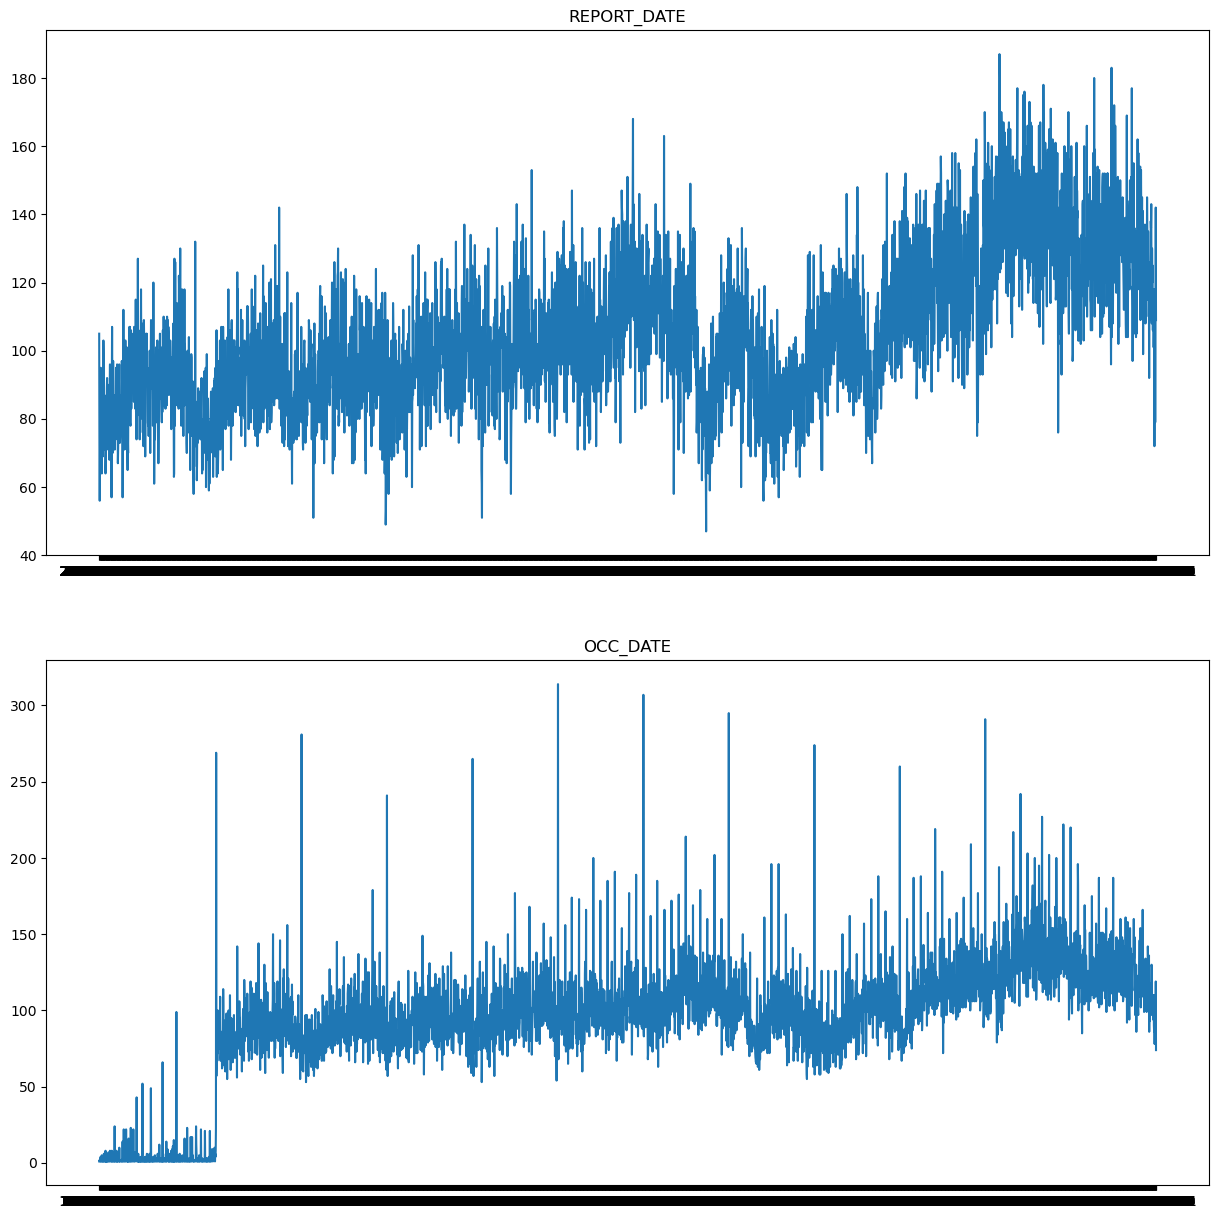

In [108]:
#REPORT_DATE and OCC_DATE

plt.figure(figsize=(15, 15))

REPORT_DATE_df = pd.DataFrame(toronto_crimes_df["REPORT_DATE"].value_counts(dropna=False)).reset_index().sort_values(by="REPORT_DATE")
REPORT_DATE_df = REPORT_DATE_df.sort_values('REPORT_DATE')

OCC_DATE_df = pd.DataFrame(toronto_crimes_df["OCC_DATE"].value_counts(dropna=False)).reset_index().sort_values(by="OCC_DATE")
OCC_DATE_df = OCC_DATE_df.sort_values('OCC_DATE')

#REPORT_DATE
plt.subplot(2, 1, 1)
plt.plot(REPORT_DATE_df['REPORT_DATE'], REPORT_DATE_df['count'])
plt.title("REPORT_DATE")

#OCC_DATE
plt.subplot(2, 1, 2)
plt.plot(OCC_DATE_df['OCC_DATE'], OCC_DATE_df['count'])
plt.title("OCC_DATE")


<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Number of Crimes in Toronto by Occurrence Date and Report Date')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Total number of crimes')

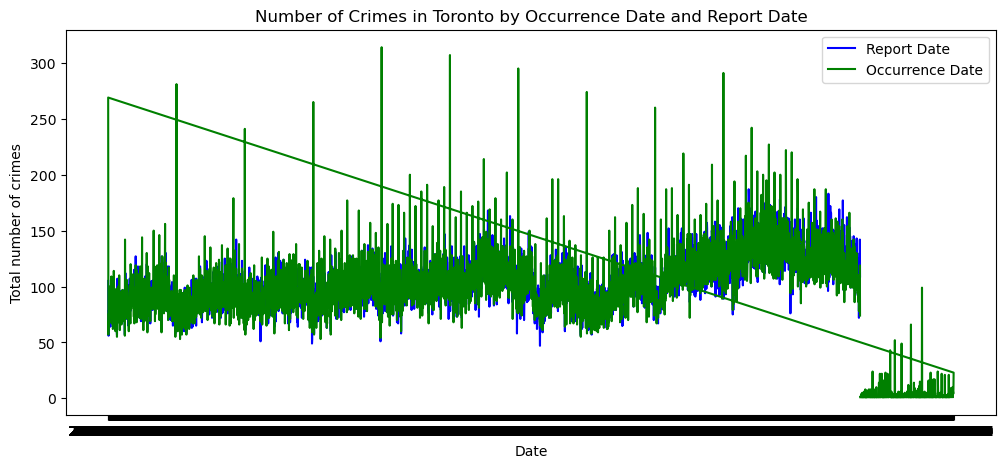

In [109]:
plt.figure(figsize=(12, 5))
plt.plot(REPORT_DATE_df["REPORT_DATE"], REPORT_DATE_df["count"], color='blue', label="Report Date")
plt.plot(OCC_DATE_df["OCC_DATE"], OCC_DATE_df["count"], color='green', label="Occurrence Date")
plt.title("Number of Crimes in Toronto by Occurrence Date and Report Date")
plt.xlabel("Date")
plt.ylabel("Total number of crimes")
plt.legend()
plt.show()

#### REPORT_YEAR and OCC_YEAR

<Figure size 800x800 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Number of Crimes in Toronto by Occurrence YEAR and Report YEAR')

Text(0.5, 0, 'YEAR of the Year')

Text(0, 0.5, 'Total number of crimes')

<Figure size 800x800 with 0 Axes>

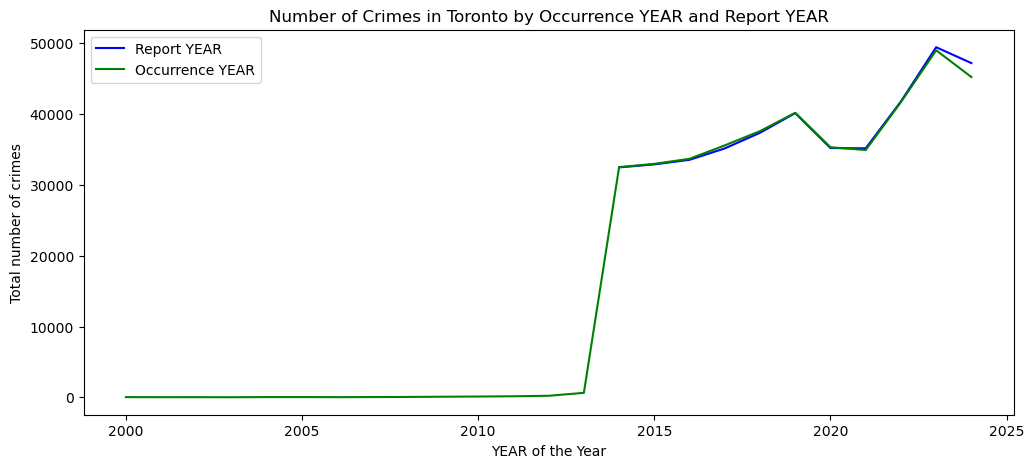

In [131]:
#REPORT_YEAR and OCC_YEAR

plt.figure(figsize=(8, 8))

#YEAR_order = list(calendar.YEAR_name)[1:] # Get full YEAR names, excluding the empty first element


REPORT_YEAR_df = pd.DataFrame(toronto_crimes_df["REPORT_YEAR"].value_counts(dropna=False)).reset_index().sort_values(by="REPORT_YEAR")
REPORT_YEAR_df = REPORT_YEAR_df[~REPORT_YEAR_df["REPORT_YEAR"].isna()]
REPORT_YEAR_df = REPORT_YEAR_df.sort_values('REPORT_YEAR')

OCC_YEAR_df = pd.DataFrame(toronto_crimes_df["OCC_YEAR"].value_counts(dropna=False)).reset_index().sort_values(by="OCC_YEAR")
OCC_YEAR_df = OCC_YEAR_df[~OCC_YEAR_df["OCC_YEAR"].isna()]
OCC_YEAR_df = OCC_YEAR_df.sort_values('OCC_YEAR')

plt.figure(figsize=(12, 5))
plt.plot(REPORT_YEAR_df["REPORT_YEAR"], REPORT_YEAR_df["count"], color='blue', label="Report YEAR")
plt.plot(OCC_YEAR_df["OCC_YEAR"], OCC_YEAR_df["count"], color='green', label="Occurrence YEAR")
plt.title("Number of Crimes in Toronto by Occurrence YEAR and Report YEAR")
plt.xlabel("YEAR of the Year")
plt.ylabel("Total number of crimes")
plt.legend()
plt.show()


#### REPORT_MONTH and OCC_MONTH

<Figure size 800x800 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Number of Crimes in Toronto by Occurrence Month and Report Month')

Text(0.5, 0, 'Month of the Year')

Text(0, 0.5, 'Total number of crimes')

<Figure size 800x800 with 0 Axes>

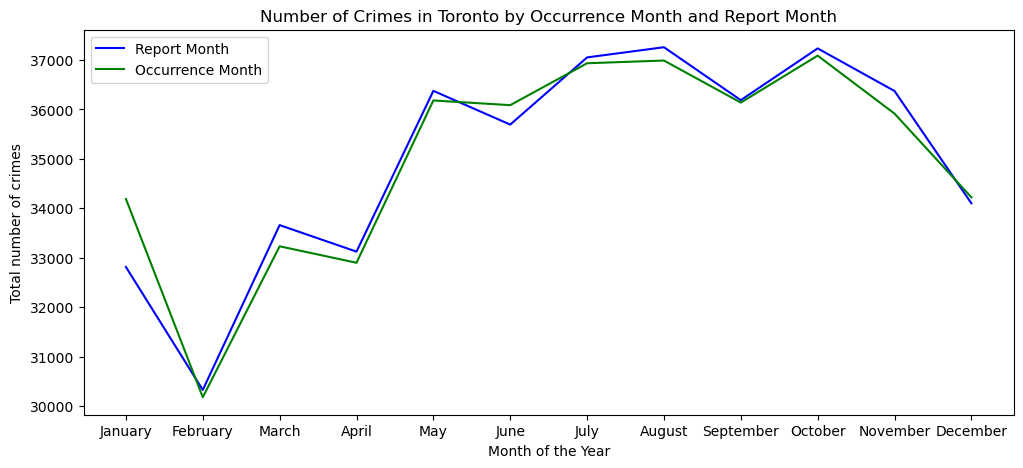

In [106]:
#REPORT_MONTH and OCC_MONTH

plt.figure(figsize=(8, 8))

month_order = list(calendar.month_name)[1:] # Get full month names, excluding the empty first element


REPORT_MONTH_df = pd.DataFrame(toronto_crimes_df["REPORT_MONTH"].value_counts(dropna=False)).reset_index().sort_values(by="REPORT_MONTH")
REPORT_MONTH_df = REPORT_MONTH_df[~REPORT_MONTH_df["REPORT_MONTH"].isna()]
REPORT_MONTH_df['REPORT_MONTH'] = pd.Categorical(REPORT_MONTH_df['REPORT_MONTH'], categories=month_order, ordered=True)
REPORT_MONTH_df = REPORT_MONTH_df.sort_values('REPORT_MONTH')

OCC_MONTH_df = pd.DataFrame(toronto_crimes_df["OCC_MONTH"].value_counts(dropna=False)).reset_index().sort_values(by="OCC_MONTH")
OCC_MONTH_df = OCC_MONTH_df[~OCC_MONTH_df["OCC_MONTH"].isna()]
OCC_MONTH_df['OCC_MONTH'] = pd.Categorical(OCC_MONTH_df['OCC_MONTH'], categories=month_order, ordered=True)
OCC_MONTH_df = OCC_MONTH_df.sort_values('OCC_MONTH')

plt.figure(figsize=(12, 5))
plt.plot(REPORT_MONTH_df["REPORT_MONTH"], REPORT_MONTH_df["count"], color='blue', label="Report Month")
plt.plot(OCC_MONTH_df["OCC_MONTH"], OCC_MONTH_df["count"], color='green', label="Occurrence Month")
plt.title("Number of Crimes in Toronto by Occurrence Month and Report Month")
plt.xlabel("Month of the Year")
plt.ylabel("Total number of crimes")
plt.legend()
plt.show()


#REPORT_MONTH
#plt.subplot(2, 1, 1)
#plt.bar(REPORT_MONTH_df["REPORT_MONTH"], REPORT_MONTH_df["count"], color='blue', edgecolor='black', width=0.35)
#plt.title("REPORT_MONTH")

#OCC_MONTH
#plt.subplot(2, 1, 2)
#plt.bar(OCC_MONTH_df["OCC_MONTH"], OCC_MONTH_df["count"], color='blue', edgecolor='black', width=0.35)
#plt.title("OCC_MONTH")


#### REPORT_DOW and OCC_DOW

<Figure size 1000x1000 with 0 Axes>

<AxesSubplot:>

<BarContainer object of 7 artists>

Text(0.5, 1.0, 'REPORT_DOW')

<AxesSubplot:>

<BarContainer object of 7 artists>

Text(0.5, 1.0, 'OCC_DOW')

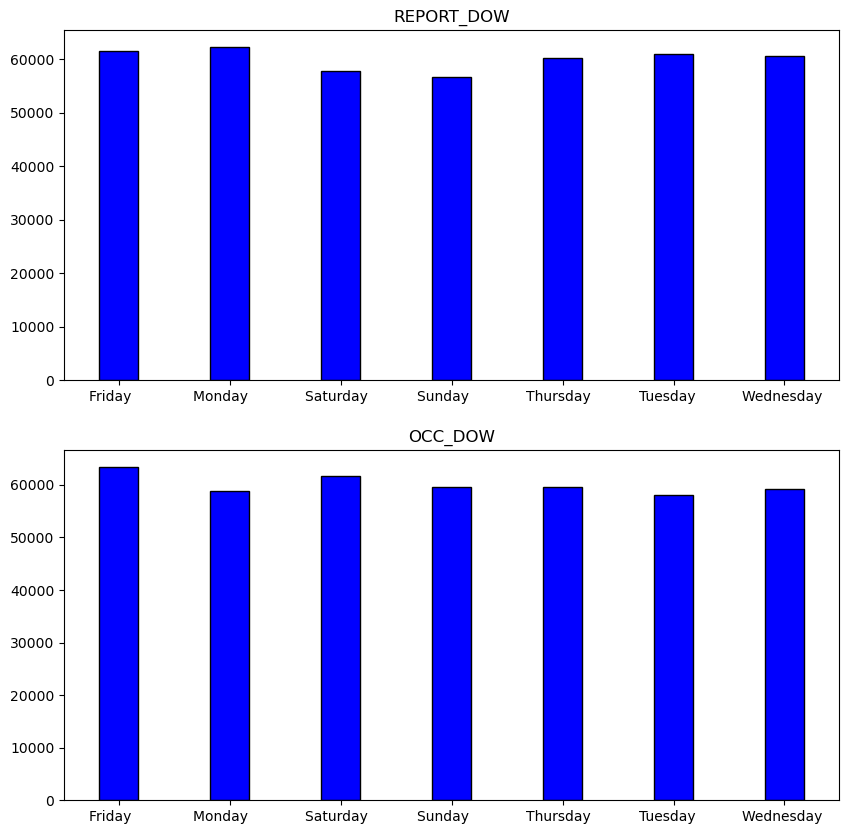

In [64]:
#REPORT_DOW and OCC_DOW

plt.figure(figsize=(10, 10))

REPORT_DOW_df = pd.DataFrame(toronto_crimes_df["REPORT_DOW"].value_counts(dropna=False)).reset_index().sort_values(by="REPORT_DOW")
REPORT_DOW_df = REPORT_DOW_df[~REPORT_DOW_df["REPORT_DOW"].isna()]

OCC_DOW_df = pd.DataFrame(toronto_crimes_df["OCC_DOW"].value_counts(dropna=False)).reset_index().sort_values(by="OCC_DOW")
OCC_DOW_df = OCC_DOW_df[~OCC_DOW_df["OCC_DOW"].isna()]

#REPORT_DOW
plt.subplot(2, 1, 1)
plt.bar(REPORT_DOW_df["REPORT_DOW"], REPORT_DOW_df["count"], color='blue', edgecolor='black', width=0.35)
plt.title("REPORT_DOW")

#OCC_DOW
plt.subplot(2, 1, 2)
plt.bar(OCC_DOW_df["OCC_DOW"], OCC_DOW_df["count"], color='blue', edgecolor='black', width=0.35)
plt.title("OCC_DOW")

### DIVISION and PREMISES TYPE

<Figure size 1000x1000 with 0 Axes>

<AxesSubplot:>

<BarContainer object of 18 artists>

Text(0.5, 1.0, 'Number of Crimes in Toronto by DIVISION')

Text(0, 0.5, 'Total Number of Crimes')

Text(0.5, 0, 'DIVISION')

<AxesSubplot:>

<BarContainer object of 7 artists>

Text(0.5, 1.0, 'Number of Crimes in Toronto by PREMISES_TYPE')

Text(0, 0.5, 'Total Number of Crimes')

Text(0.5, 0, 'PREMISES_TYPE')

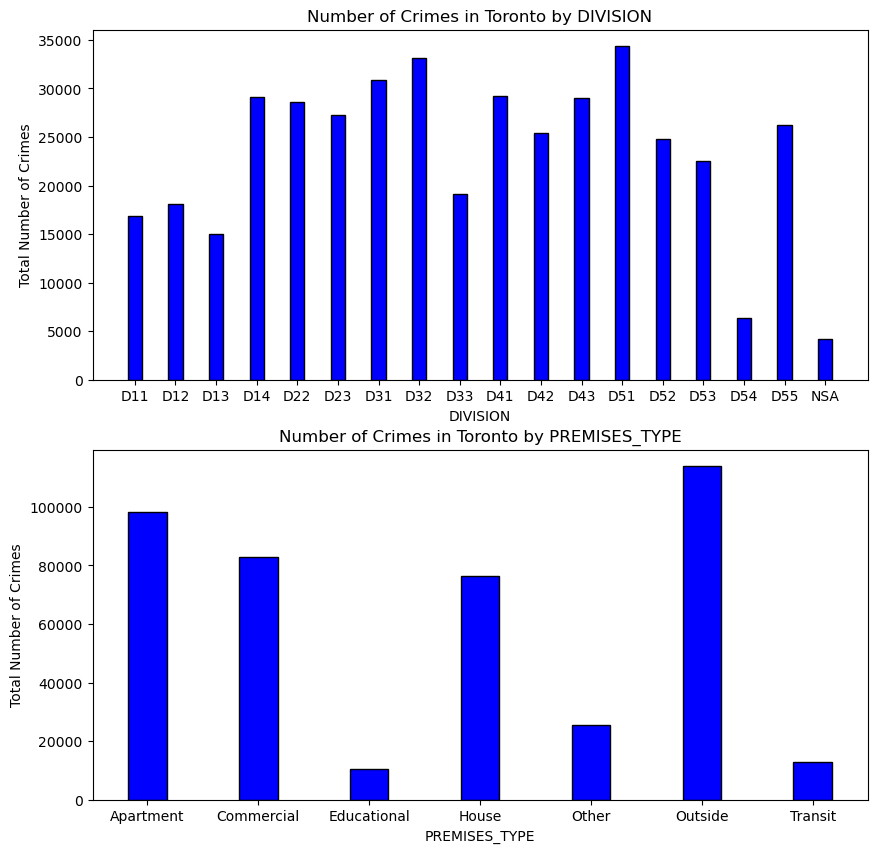

In [133]:
location_vals = ['DIVISION','PREMISES_TYPE']
plt.figure(figsize=(10, 10))
for index, val in enumerate(location_vals):
    df = pd.DataFrame(toronto_crimes_df[val].value_counts(dropna=False)).reset_index().sort_values(by=val)
    df = df[~df[val].isna()]
    plt.subplot(len(location_vals), 1, index + 1)
    plt.bar(df[val], df["count"], color='blue', edgecolor='black', width=0.35)
    plt.title('Number of Crimes in Toronto by ' + val)
    plt.ylabel("Total Number of Crimes")
    plt.xlabel(val)

### LOCATION TYPE 

In [81]:
pd.DataFrame(toronto_crimes_df.groupby(by = ["PREMISES_TYPE"])["LOCATION_TYPE"].agg(set))

LOCATION_TYPE
PREMISES_TYPE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
Apartment                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     {Apartment (Rooming House, Condo)}
Commercial                                                                                                                                                                                                                                                         {Dealership (Car, Motorcycle, Marine, Trailer, Etc.), Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg, Convenience Stores, Bank And Other Financial Institutions (Money Mart, Tsx), Gas Station (Self, Full, Attached Convenience), Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental), Construction Site (Warehouse, Trailer, Shed), Bar / Restaurant}
Educational                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 {Schools During Supervised Activity, Schools During Un-Supervised Activity, Universities / Colleges}
House                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      {Single Home, House (Attach Garage, Cottage, Mobile)}
Other          {Cargo Train, Private Property Structure (Pool, Shed, Detached Garage), Jails / Detention Centres, Other Train Tracks, Pharmacy, Community Group Home, Hospital / Institutions / Medical Facilities (Clinic, Dentist, Morgue), Other Non Commercial / Corporate Places (Non-Profit, Gov'T, Firehall), Halfway House / Young Offender Group Home, Halfway House, Retirement Home, Group Homes (Non-Profit, Halfway House, Social Agency), Group Homes (Non-Profit, Halfway House,, Homeless Shelter / Mission, Nursing Home, Religious Facilities (Synagogue, Church, Convent, Mosque), Unknown, Police / Courts (Parole Board, Probation Office)}
Outside                                                                                                                                     

In [77]:
#LOCATION_TYPE
pd.DataFrame(toronto_crimes_df["LOCATION_TYPE"].value_counts(dropna=False)).reset_index().sort_values(by="LOCATION_TYPE")

LOCATION_TYPE  count
0                    Apartment (Rooming House, Condo)  98358
19  Bank And Other Financial Institutions (Money M...   2259
5                                    Bar / Restaurant  15824
51                                        Cargo Train     16
10  Commercial Dwelling Unit (Hotel, Motel, B & B,...   4539
34                               Community Group Home    397
17       Construction Site (Warehouse, Trailer, Shed)   2802
9                                  Convenience Stores   5346
21  Dealership (Car, Motorcycle, Marine, Trailer, ...   2095
20     Gas Station (Self, Full, Attached Convenience)   2161
40                                             Go Bus     84
33                                         Go Station    630
39                                           Go Train    104
37            Group Homes (Non-Profit, Halfway House,    135
22  Group Homes (Non-Profit, Halfway House, Social...   1427
45                                      Halfway House     32
52          Halfway House / Young Offender Group Home     13
18                         Homeless Shelter / Mission   2672
13  Hospital / Institutions / Medical Facilities (...   3547
16                          Jails / Detention Centres   3357
27                                       Nursing Home   1048
6                   Open Areas (Lakes, Parks, Rivers)   8334
3   Other Commercial / Corporate Places (For Profi...  47984
15  Other Non Commercial / Corporate Places (Non-P...   3386
42                              Other Passenger Train     48
35                      Other Passenger Train Station    168
36              Other Regional Transit System Vehicle    144
46              Other Train Admin Or Support Facility     28
48                                 Other Train Tracks     28
49                                   Other Train Yard     21
4   Parking Lots (Apt., Commercial Or Non-Commercial)  39134
24                                           Pharmacy   1250
28   Police / Courts (Parole Board, Probation Office)   1024
11  Private Property Structure (Pool, Shed, Detach...   4299
29  Religious Facilities (Synagogue, Church, Conve...    987
32                                    Retirement Home    663
7                  Schools During Supervised Activity   6175
14              Schools During Un-Supervised Activity   3497
1   Single Home, House (Attach Garage, Cottage, Mo...  76280
2   Streets, Roads, Highways (Bicycle Path, Privat...  65189
41                      Ttc Admin Or Support Facility     84
12                                            Ttc Bus   3633
43                                     Ttc Bus Garage     40
25                      Ttc Bus Stop / Shelter / Loop   1148
38                     Ttc Light Rail Transit Station    129
44                             Ttc Light Rail Vehicle     32
31                                     Ttc Street Car    789
8                                  Ttc Subway Station   5544
23                                   Ttc Subway Train   1396
47                 Ttc Subway Tunnel / Outdoor Tracks     28
53                                Ttc Support Vehicle      3
50                            Ttc Wheel Trans Vehicle     17
30                            Universities / Colleges    797
26                                            Unknown   1075

#### OFFENCE and MCI_CATEGORY

<Figure size 1000x1000 with 0 Axes>

<AxesSubplot:>

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'Number of Crimes in Toronto by MCI_CATEGORY')

Text(0, 0.5, 'Total Number of Crimes')

Text(0.5, 0, 'MCI_CATEGORY')

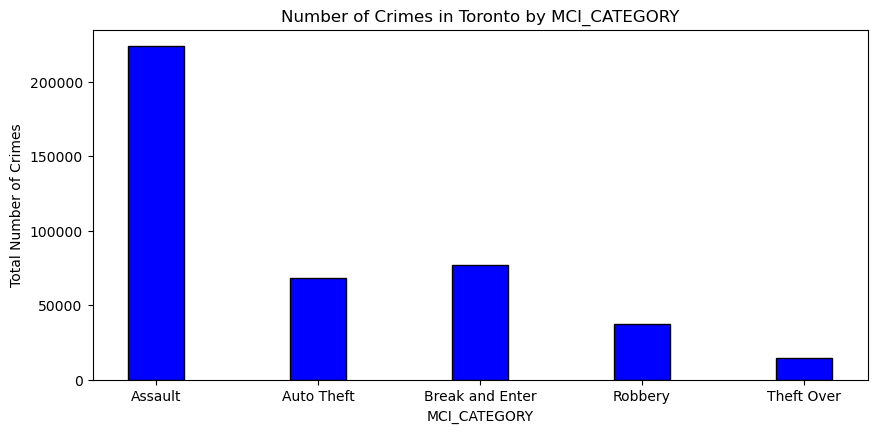

In [134]:
offence_vals = ['MCI_CATEGORY']
plt.figure(figsize=(10, 10))
for index, val in enumerate(offence_vals):
    df = pd.DataFrame(toronto_crimes_df[val].value_counts(dropna=False)).reset_index().sort_values(by=val)
    df = df[~df[val].isna()]
    plt.subplot(len(location_vals), 1, index + 1)
    plt.bar(df[val], df["count"], color='blue', edgecolor='black', width=0.35)
    plt.title('Number of Crimes in Toronto by ' + val)
    plt.ylabel("Total Number of Crimes")
    plt.xlabel(val)

In [85]:
pd.DataFrame(toronto_crimes_df.groupby(by = ["MCI_CATEGORY"])["OFFENCE"].agg(set))

OFFENCE
MCI_CATEGORY                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
Assault          {Assault With Weapon, Aggravated Aslt Peace Officer, Assault - Force/Thrt/Impede, Assault, Assault Peace Officer Wpn/Cbh, Discharge Firearm - Recklessly, Pointing A Firearm, Use Firearm / Immit Commit Off, Assault Peace Officer, Discharge Firearm With Intent, Disarming Peace/Public Officer, Assault - Resist/ Prevent Seiz, Hoax Terrorism Causing Bodily, Administering Noxious Thing, Assault Bodily Harm, Aggravated Assault Avails Pros, Crim Negligence Bodily Harm, Aggravated Assault, Traps Likely Cause Bodily Harm, Set/Place Trap/Intend Death/Bh, Air Gun Or Pistol: Bodily Harm, Unlawfully Causing Bodily Harm}
Auto Theft                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    {Theft Of Motor Vehicle}
Break and Enter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       {B&E - M/Veh To Steal Firearm, B&E - To Steal Firearm, Unlawfully In Dwelling-House, B&E W'Intent, B&E, B&E Out}
Robbery                                                                                                                                                                                                                                                                                                                       {Robbery - Atm, Robbery - Purse Snatch, Robbery - Business, Robbery - Vehicle Jacking, Robbery - Other, Robbery - Mugging, Robbery - Delivery Person, Robbery - Swarming, Robbery With Weapon, Robbery - Home Invasion, Robbery To Steal Firearm, Robbery - Financial Institute, Robbery - Armoured Car, Robbery - Taxi}
Theft Over                                                                                                                                                                                                                                                                                                                                                                                                                                   {Theft - Misapprop Funds Over, Theft Over - Shoplifting, Theft Of Utilities Over, Theft Over - Bicycle, Theft Over, Theft From Mail / Bag / Key, Theft Over - Distraction, Theft From Motor Vehicle Over}

#### HOOD_158, NEIGHBOURHOOD_158, HOOD_140 and NEIGHBOURHOOD_140

<Figure size 1000x1000 with 0 Axes>

<AxesSubplot:>

<BarContainer object of 159 artists>

Text(0.5, 1.0, 'HOOD_158')

<AxesSubplot:>

<BarContainer object of 159 artists>

Text(0.5, 1.0, 'NEIGHBOURHOOD_158')

<AxesSubplot:>

<BarContainer object of 141 artists>

Text(0.5, 1.0, 'HOOD_140')

<AxesSubplot:>

<BarContainer object of 141 artists>

Text(0.5, 1.0, 'NEIGHBOURHOOD_140')

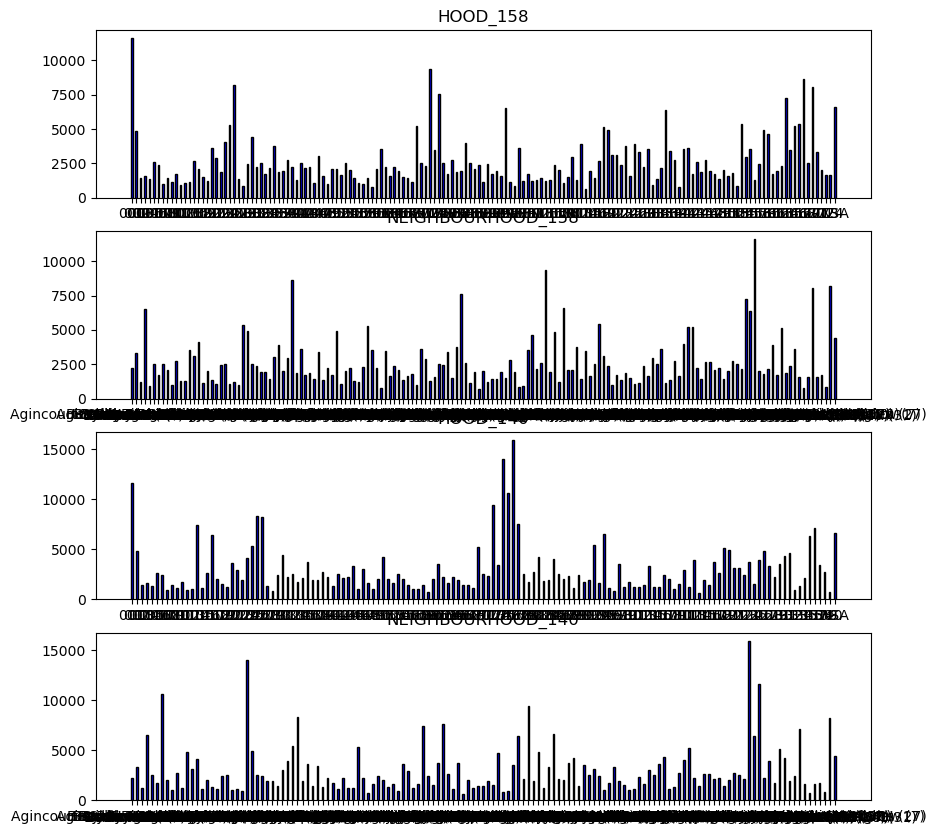

In [87]:
offence_vals = ['HOOD_158','NEIGHBOURHOOD_158','HOOD_140','NEIGHBOURHOOD_140']
plt.figure(figsize=(10, 10))
for index, val in enumerate(offence_vals):
    df = pd.DataFrame(toronto_crimes_df[val].value_counts(dropna=False)).reset_index().sort_values(by=val)
    df = df[~df[val].isna()]
    plt.subplot(len(offence_vals), 1, index + 1)
    plt.bar(df[val], df["count"], color='blue', edgecolor='black', width=0.35)
    plt.title(val)

#### LONGITUDE VS LATITUDE

<AxesSubplot:xlabel='LONG_WGS84', ylabel='LAT_WGS84'>

Text(0.5, 1.0, 'Latitude vs. Longitude')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

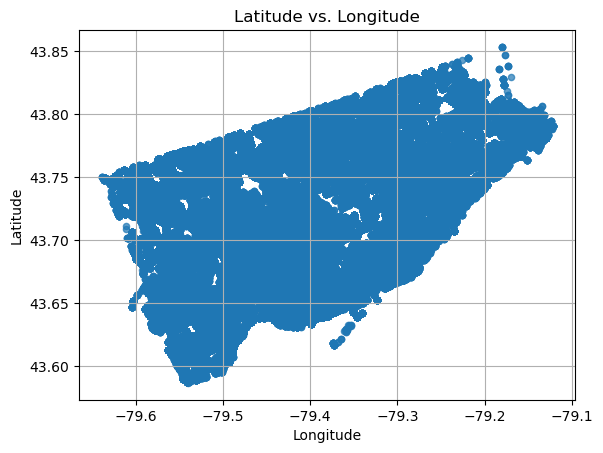

In [120]:
# Create a scatter plot
#toronto_crimes_df.plot(x='LONG_WGS84', y='LAT_WGS84', kind='scatter', s=df['value']*10, alpha=0.7)
toronto_crimes_df.plot(x='LONG_WGS84', y='LAT_WGS84', kind='scatter', alpha=0.7)

plt.title('Latitude vs. Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

<Figure size 2000x2000 with 0 Axes>

Text(0.5, 1.0, 'Location of Crimes in Toronto using Latitude vs. Longitude')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

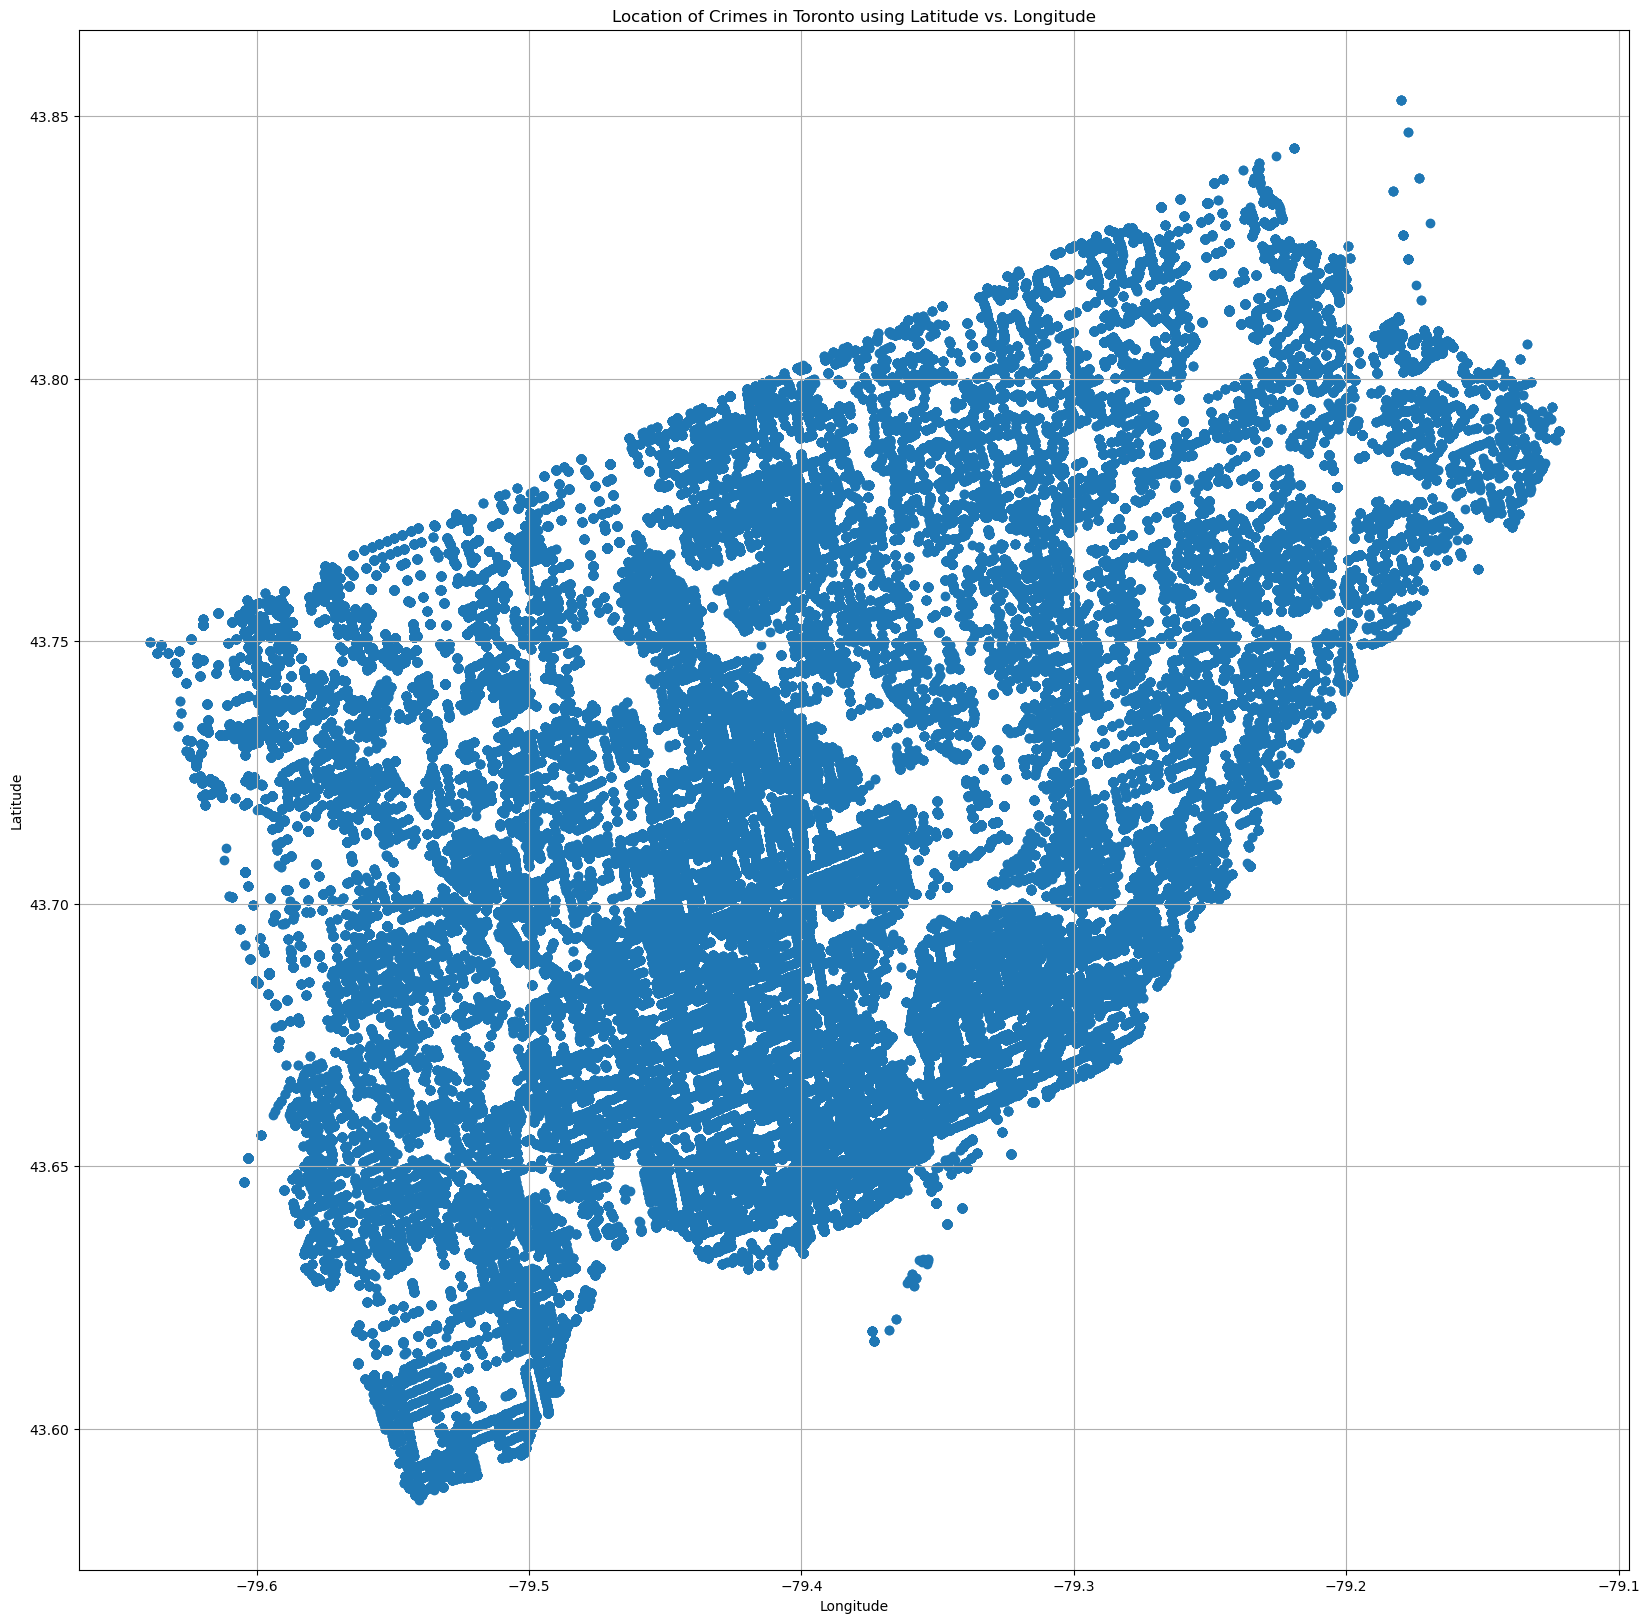

In [135]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

# Create a scatter plot
plt.figure(figsize=(20, 20))
plt.scatter(toronto_crimes_df['LONG_WGS84'], toronto_crimes_df['LAT_WGS84'])

plt.title('Location of Crimes in Toronto using Latitude vs. Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

<Figure size 2000x2000 with 0 Axes>

Text(0.5, 1.0, 'Latitude vs. Longitude')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

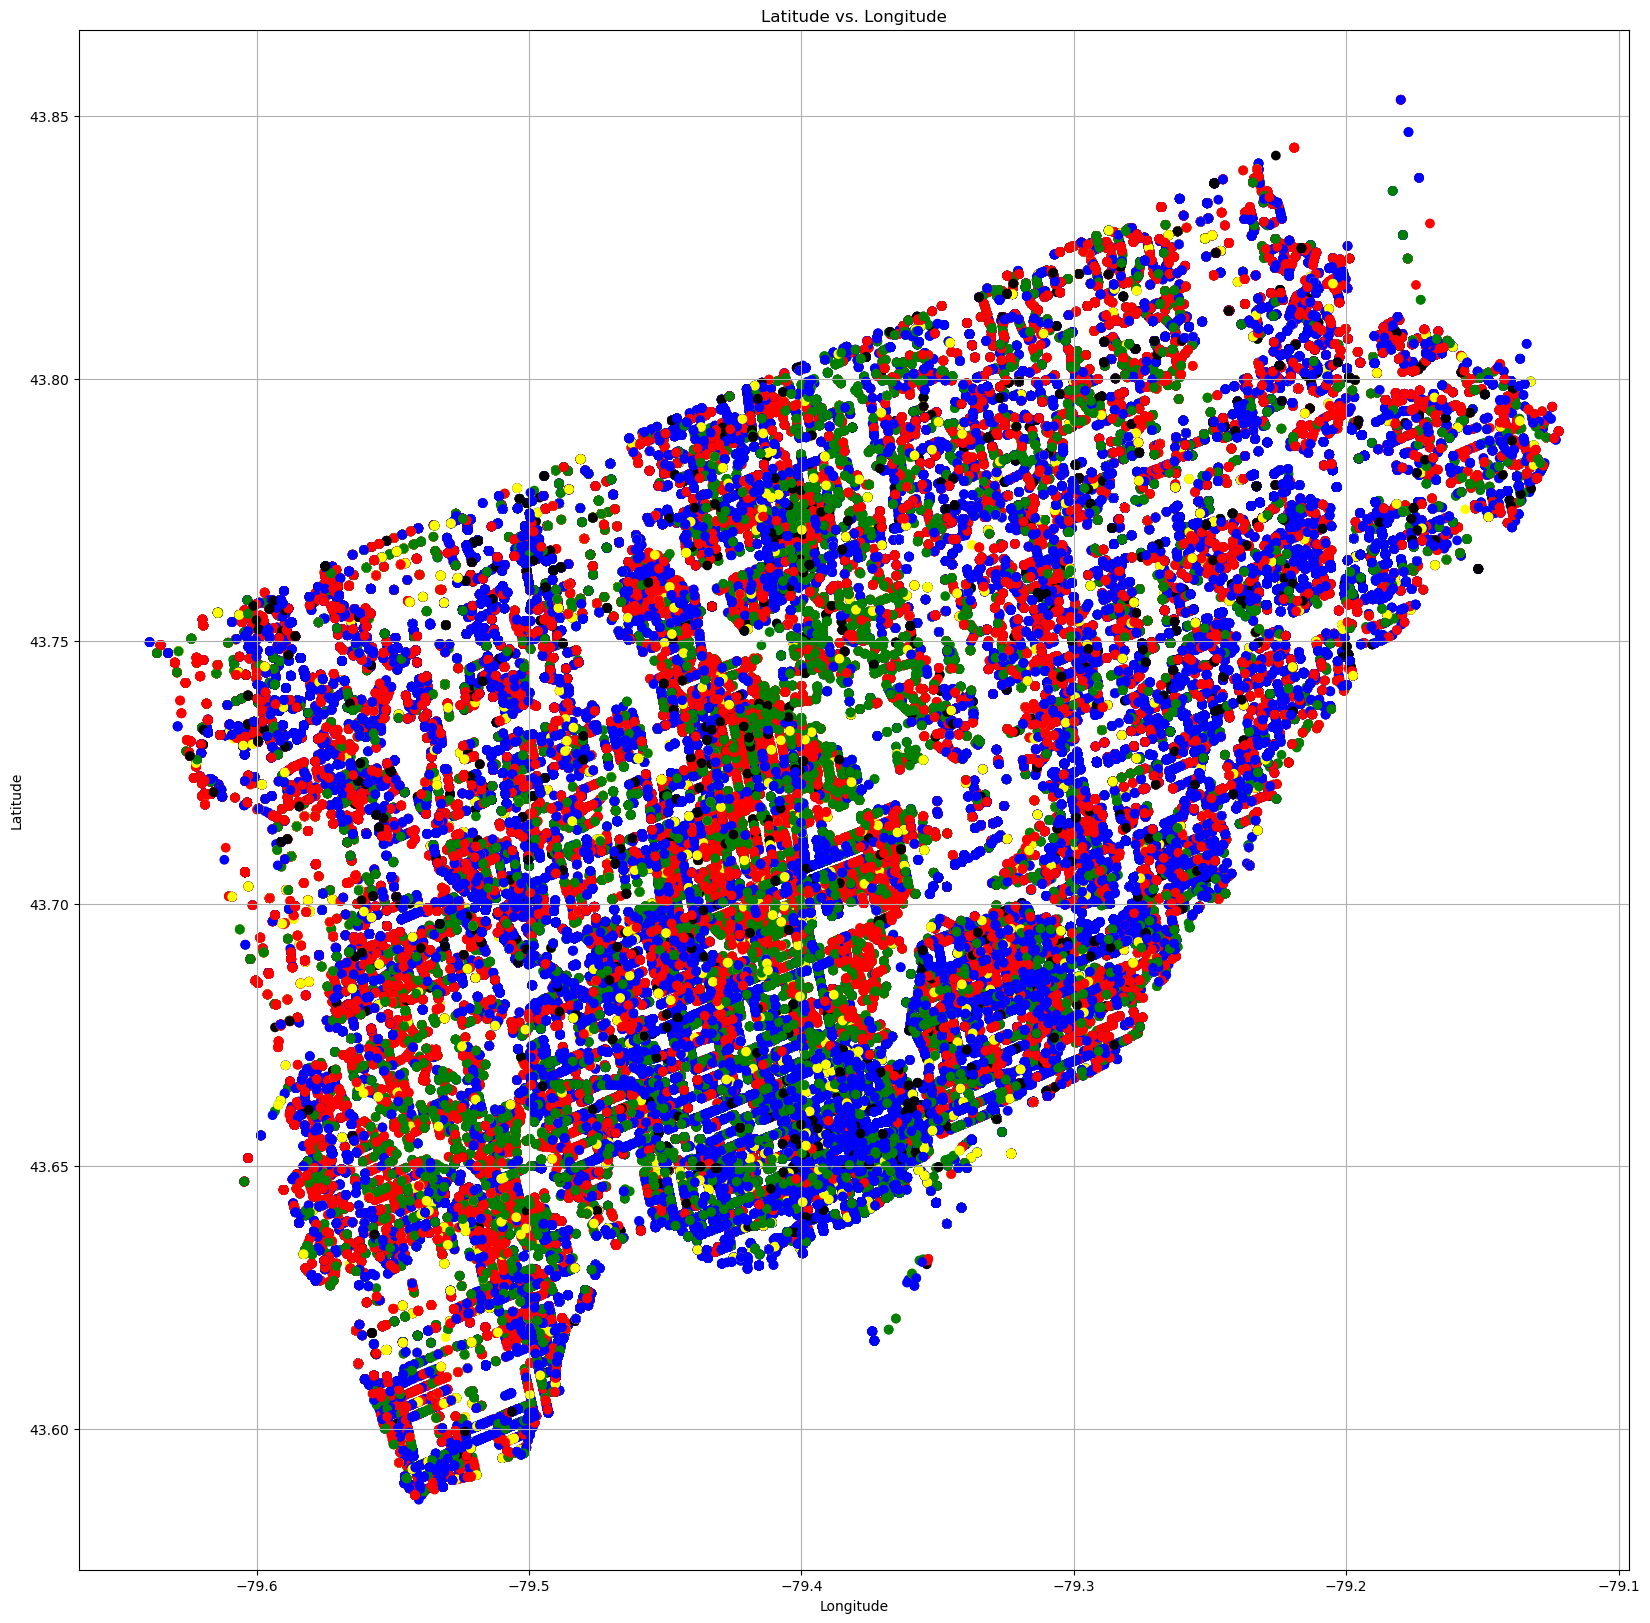

In [125]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

# Create a scatter plot
plt.figure(figsize=(20, 20))

# Define a color map for the groups and map the 'group' column to colors
color_map = {'Auto Theft': 'red', 
             'Assault': 'blue', 
             'Break and Enter': 'green',
             'Theft Over':'yellow',
             'Robbery':'black'}
colors = toronto_crimes_df["MCI_CATEGORY"].map(color_map)

#toronto_crimes_df.plot(x='LONG_WGS84', y='LAT_WGS84', kind='scatter', alpha=0.7)
plt.scatter(toronto_crimes_df['LONG_WGS84'], toronto_crimes_df['LAT_WGS84'], c=colors)

plt.title('Latitude vs. Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
#plt.legend()
plt.show()

<Figure size 2000x2000 with 0 Axes>

Text(0.5, 1.0, 'Latitude vs. Longitude')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

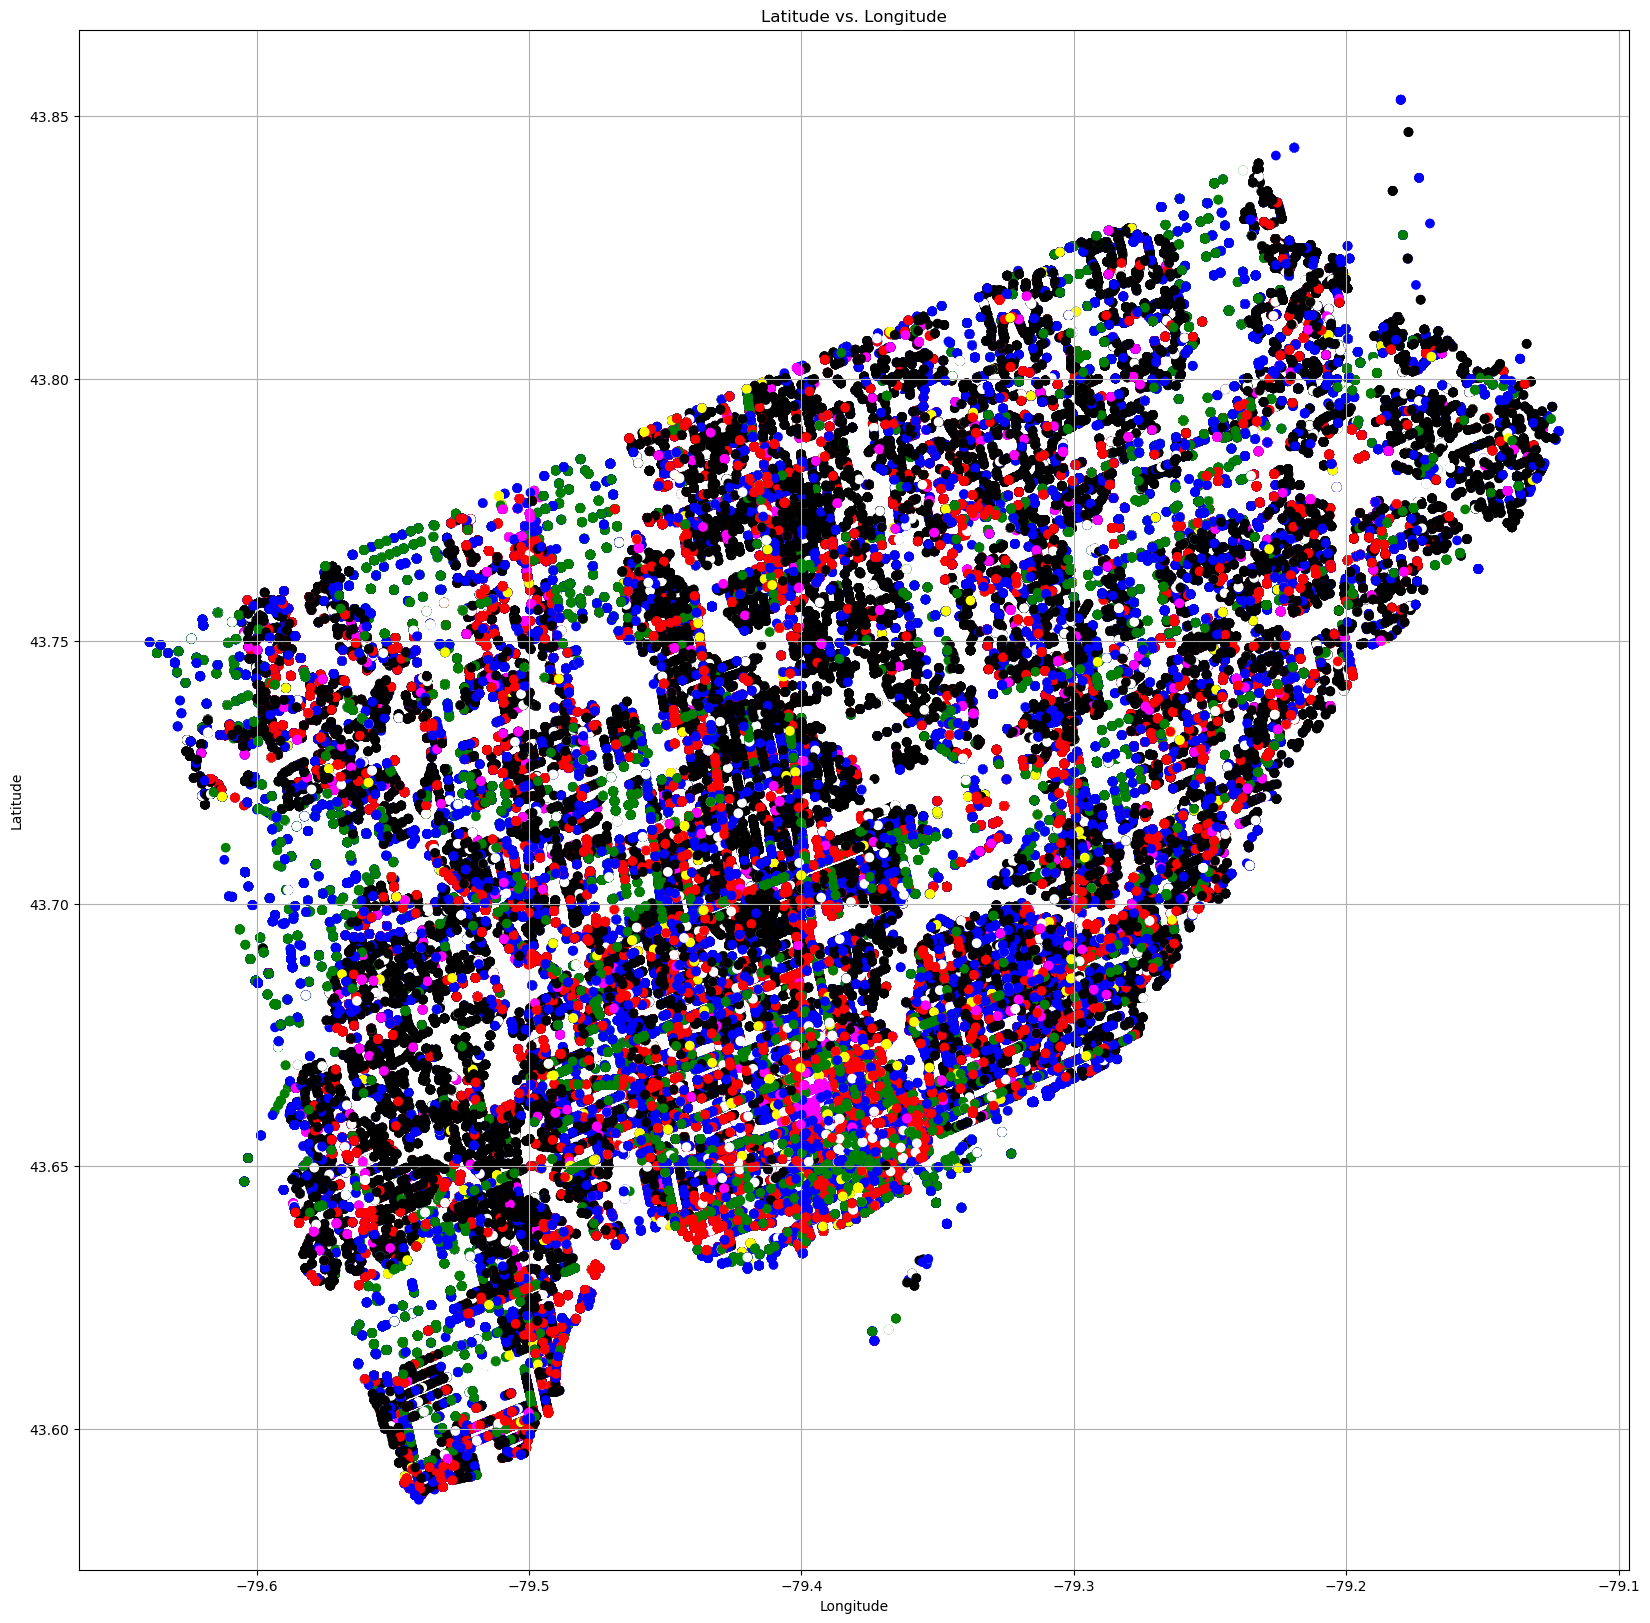

In [128]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

# Create a scatter plot
plt.figure(figsize=(20, 20))

# Define a color map for the groups and map the 'group' column to colors
color_map = {'Apartment': 'red', 
             'Outside': 'blue', 
             'Commercial': 'green',
             'Transit':'yellow',
             'House':'black',
             'Other':'white',
             'Educational':'magenta'}
colors = toronto_crimes_df["PREMISES_TYPE"].map(color_map)

#toronto_crimes_df.plot(x='LONG_WGS84', y='LAT_WGS84', kind='scatter', alpha=0.7)
plt.scatter(toronto_crimes_df['LONG_WGS84'], toronto_crimes_df['LAT_WGS84'], c=colors)

plt.title('Latitude vs. Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
#plt.legend()
plt.show()

### MISCELLANEOUS

In [ ]:



import requests
 
# Toronto Open Data is stored in a CKAN instance. It's APIs are documented here:
# https://docs.ckan.org/en/latest/api/
 
# To hit our API, you'll be making requests to:
base_url = "https://ckan0.cf.opendata.inter.prod-toronto.ca + '"
 
# Datasets are called "packages". Each package can contain many "resources"
# To retrieve the metadata for this package and its resources, use the package name in this page's URL:
url = base_url + "/api/3/action/package_show"
params = { "id": "major-crime-indicators"}
package = requests.get(url, params = params).json()
 
# To get resource data:
for idx, resource in enumerate(package["result"]["resources"]):
 
       # for datastore_active resources:
       if resource["datastore_active"]:
 
           # To get all records in CSV format:
           url = base_url + "/datastore/dump/" + resource["id"]
           resource_dump_data = requests.get(url).text
           print(resource_dump_data)
 
           # To selectively pull records and attribute-level metadata:
           url = base_url + "/api/3/action/datastore_search"
           p = { "id": resource["id"] }
           resource_search_data = requests.get(url, params = p).json()["result"]
           print(resource_search_data)
           # This API call has many parameters. They're documented here:
           # https://docs.ckan.org/en/latest/maintaining/datastore.html
 
       # To get metadata for non datastore_active resources:
       if not resource["datastore_active"]:
           url = base_url + "/api/3/action/resource_show?id=" + resource["id"]
           resource_metadata = requests.get(url).json()
           print(resource_metadata)
           # From here, you can use the "url" attribute to download this file
Toronto Open Data online accountsEmail Open Data Toronto Share on X Visit Open Data Toronto on Github
 CopyrightCity of Toronto 1998 - 2025